<br>

## Matplotlib Tutorial: Subplots

<img width="40%" class="imgright" src="../images/multiple_plots.webp" srcset="../images/multiple_plots_700w.webp 700w,../images/multiple_plots_600w.webp 600w,../images/multiple_plots_500w.webp 500w,../images/multiple_plots_400w.webp 400w,../images/multiple_plots_350w.webp 350w,../images/multiple_plots_300w.webp 300w" alt="multiple plots" />

We have given so far lots of examples for plotting graphs in the previous chapters of our Python tutorial on Matplotlib. A frequently asked question is how to have multiple plots in one graph?

In the simplest case this might mean, that you have one curve and you want another curve printed over it. This is not a problem, because it will be enough to put the two plots in your scripts, as we have seen before. The more interesting case is, if you want two plots beside of each other for example. In one figure but in two subplots. The idea is to have more than one graph in one window and each graph appears in its own subplot.

We will demonstrate in our examples how this can be accomplished with the funtion ```subplots```.


<br><br>

### Creating Subplots with subplots

<br>

The function ```subplot``` create a figure and a set of subplots. It is a wrapper function to make it convenient to create common layouts of subplots, including the enclosing figure object, in a single call.

This function returns a figure and an Axes object or an array of Axes objects.

If we call this function without any parameters - like we do in the following example - a Figure object and one Axes object will be returned: 

Figure(432x288) AxesSubplot(0.125,0.125;0.775x0.755)


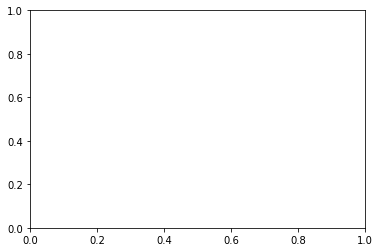

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
print(fig, ax)



The parameter of subplots function are:

<code>subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)</code>

| Parameter  |  Meaning |
|------------|----------|
|nrows, ncols   | int, optional, default: 1<br>Number of rows/columns of the subplot grid. |
|sharex| bool or {'none', 'all', 'row', 'col'}, default: False<br>Controls sharing of properties among x (```sharex```) axis: If ```sharex``` is set to ```True``` or ```all```, the x-axis will be shared among all subplots. If ```sharex``` is set to ```False``` or ```none```, each  x-axis of a subplot will be               independent. If it is set to ```row```, each subplot row will share an x-axis. If it is set to ```col```, each subplot column will share an x-axis.|
|sharey|analogue to sharex<br>When subplots have a shared x-axis along a column, only the x tick labels of the bottom subplot are created. Similarly, when subplots have a shared y-axis along a row, only the y tick labels of the first column subplot are created.|
|squeeze |bool, optional, default: True<br>If ```squeeze``` is set to ```True```, extra dimensions are squeezed out from the returned Axes object|
|num |integer or string, optional, default: None<br>A ```.pyplot.figure``` keyword that sets the figure number or label.|
|subplot_kw | dict, optional<br>Dict with keywords passed to the `~matplotlib.figure.Figure.add_subplot` call used to create each subplot.|
|gridspec_kw| dict, optional<br>Dict with keywords passed to the `~matplotlib.gridspec.GridSpec` constructor used to create the grid the subplots are placed on.|
|**fig_kw | All additional keyword arguments are passed to the `.pyplot.figure` call.|



<br>


In the previous chapters of our tutorial, we saw already the simple case of creating one figure and one axes. 

Text(0.5, 1.0, 'Simple plot')

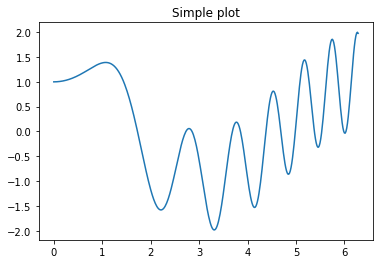

In [6]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2) + np.cos(x)
    
#Creates just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')


We will demonstrate now, how to create to subplots beside of each other. By setting the parameter ```sharey``` to ``` True```, we make sure that the y labels are not repeated on the right subplot: 

<Figure size 432x288 with 0 Axes>

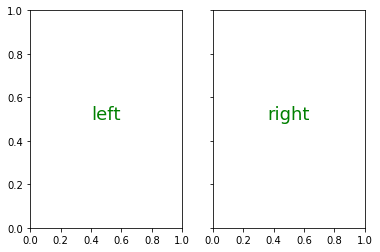

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))

fig, (ax1, ax2)  = plt.subplots(1, 2,
                                sharey='row')

ax1.text(0.5, 0.5, 
              "left",
              color="green",
              fontsize=18, 
              ha='center')

ax2.text(0.5, 0.5, 
              "right",
              color="green",
              fontsize=18, 
              ha='center')

plt.show()

Now with some 'real' data:

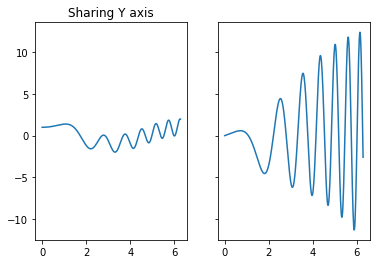

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, 
                             sharey=True)
derivative = 2 * x * np.cos(x**2) - np.sin(x)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.plot(x, derivative)


We demonstrate in the following example how to create a subplot for polar plotting. We achieve this by creating a key ```polar``` in the the ```subplot_kw``` dictionary and set it to ```True```:

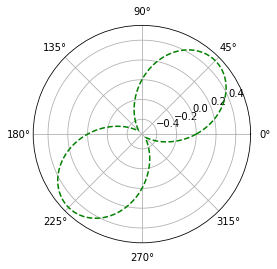

In [9]:

fig, ax = plt.subplots(1, subplot_kw=dict(polar=True))
ax.plot(x, np.sin(x) * np.cos(x), "--g")


The first two parameters of ```subplots``` define the numbers of rows and columns respectively. We demonstrate this in the following example. To demonstrate the structure we use the ```text``` method of the axis objects. We use it to put the 

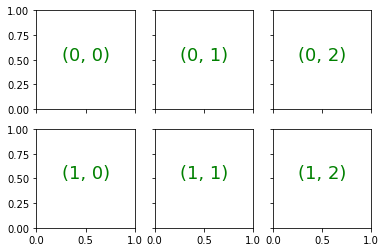

In [1]:
import matplotlib.pyplot as plt

rows, cols = 2, 3
fig, ax = plt.subplots(rows, cols,
                       sharex='col', 
                       sharey='row')

for row in range(rows):
    for col in range(cols):
        ax[row, col].text(0.5, 0.5, 
                          str((row, col)),
                          color="green",
                          fontsize=18, 
                          ha='center')

plt.show()

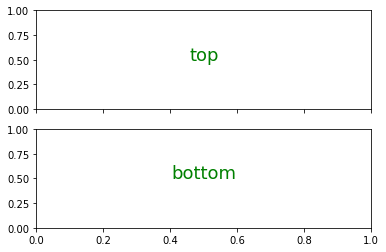

In [11]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(6, 4))

fig, ax = plt.subplots(2, 
           sharex='col', sharey='row')

ax[0].text(0.5, 0.5, 
              "top",
              color="green",
              fontsize=18, 
              ha='center')

ax[1].text(0.5, 0.5, 
              "bottom",
              color="green",
              fontsize=18, 
              ha='center')

plt.show()

We will create now a similar structure with two subplots on top of each other containing polar plots:

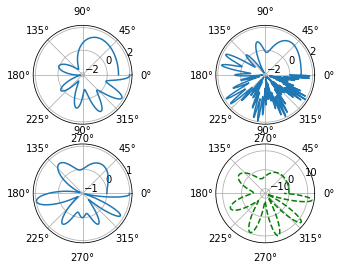

In [12]:
fig, axes = plt.subplots(2, 2, subplot_kw=dict(polar=True))
axes[0, 0].plot(x, y)
axes[0, 1].plot(x, np.sin(x**2) + np.cos(x**3))
axes[1, 0].plot(x, np.cos(x) * np.sin(x**2))
axes[1, 1].plot(x, derivative, "g--")

Now with titles for subplots:

<Figure size 432x288 with 0 Axes>

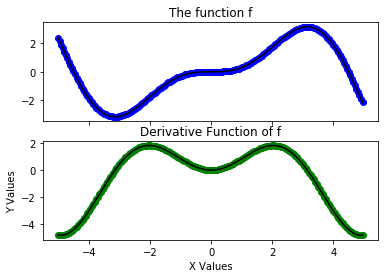

In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))

def f(x):
    return np.sin(x) - x * np.cos(x)

def fp(x):
    """ The derivative of f """
    return x * np.sin(x)

X = np.arange(-5, 5.0, 0.05)

fig, ax = plt.subplots(2, 
           sharex='col', sharey='row')

ax[0].plot(X, f(X), 'bo', X, f(X), 'k')
ax[0].set(title='The function f')

ax[1].plot(X, fp(X), 'go', X, fp(X), 'k')
ax[1].set(xlabel='X Values', ylabel='Y Values',
       title='Derivative Function of f')

plt.show()

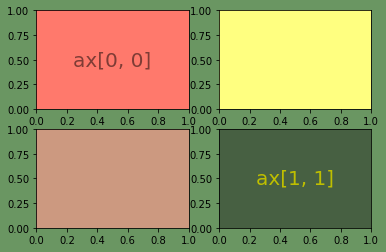

In [14]:
import matplotlib.pyplot as plt
python_course_green = "#476042"
python_course_orange = "#f17c0b"
python_course_green_light = "#6a9662"
#plt.figure(figsize=(6, 4))
fig, ax = plt.subplots(2, 2, 
                       figsize=(6, 4),
                       facecolor=python_course_green_light)
                      

ax[0, 0].text(0.5, # x-Koordinate, 0 ganz links, 1 ganz rechts
              0.5, # y-Koordinate, 0 ganz oben, 1 ganz unten
              'ax[0, 0]', # der Text der ausgegeben wird
               horizontalalignment='center', # abgekürzt 'ha' 
               verticalalignment='center', # abgekürzt 'va'
               fontsize=20,
               alpha=.5 )
              
ax[0, 0].set_facecolor('xkcd:salmon')

ax[1,1].text(0.5, 0.5, 
         'ax[1, 1]', 
         ha='center', va='center',
         fontsize=20,
         color="y")
ax[1, 0].set_facecolor((0.8, 0.6, 0.5))
ax[0, 1].set_facecolor((1, 1, 0.5))
ax[1, 1].set_facecolor(python_course_green)
plt.show()

Let us get rid of the ticks again. This time we cannot use <code>plt.xticks(())</code> and <code>plt.yticks(())</code>. We have to use the <code>set_xticks(())</code> and <code>set_yticks(())</code> methods instead.

Activating all subplot of the 2x2 grid looks like this:

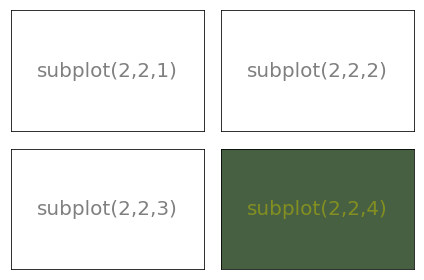

In [17]:
import matplotlib.pyplot as plt

python_course_green = "#476042"
fig = plt.figure(figsize=(6, 4))
sub1 = plt.subplot(2, 2, 1)
sub1.set_xticks(())
sub1.set_yticks(())
sub1.text(0.5, 0.5, 'subplot(2,2,1)', ha='center', va='center',
        size=20, alpha=.5)

sub2 = plt.subplot(2, 2, 2)
sub2.set_xticks(())
sub2.set_yticks(())
sub2.text(0.5, 0.5, 'subplot(2,2,2)', ha='center', va='center',
        size=20, alpha=.5)

sub3 = plt.subplot(2, 2, 3)
sub3.set_xticks(())
sub3.set_yticks(())
sub3.text(0.5, 0.5, 'subplot(2,2,3)', ha='center', va='center',
        size=20, alpha=.5)

sub4 = plt.subplot(2, 2, 4, facecolor=python_course_green)
sub4.set_xticks(())
sub4.set_yticks(())
sub4.text(0.5, 0.5, 'subplot(2,2,4)', ha='center', va='center',
        size=20, alpha=.5, color="y")

fig.tight_layout()
plt.show()

The previous examples are solely showing how to create a subplot design. Usually, you want to write Python programs using Matplotlib and its subplot features to depict some graphs. We will demonstrate how to populate the previous subplot design with some example graphs:

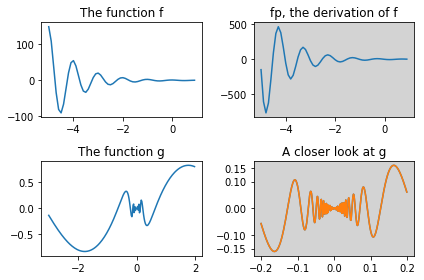

In [18]:

import numpy as np
from numpy import e, pi, sin, exp, cos
import matplotlib.pyplot as plt

def f(t):
    return exp(-t) * cos(2*pi*t)

def fp(t):
    return -2*pi * exp(-t) * sin(2*pi*t) - e**(-t)*cos(2*pi*t)

def g(t):
    return sin(t) * cos(1/(t+0.1))

def g(t):
    return sin(t) * cos(1/(t))


python_course_green = "#476042"
fig = plt.figure(figsize=(6, 4))

t = np.arange(-5.0, 1.0, 0.1)

sub1 = fig.add_subplot(221) # instead of plt.subplot(2, 2, 1)
sub1.set_title('The function f') # non OOP: plt.title('The function f')
sub1.plot(t, f(t))


sub2 = fig.add_subplot(222, facecolor="lightgrey")
sub2.set_title('fp, the derivation of f')
sub2.plot(t, fp(t))


t = np.arange(-3.0, 2.0, 0.02)
sub3 = fig.add_subplot(223)
sub3.set_title('The function g')
sub3.plot(t, g(t))

t = np.arange(-0.2, 0.2, 0.001)
sub4 = fig.add_subplot(224, facecolor="lightgrey")
sub4.set_title('A closer look at g')
sub4.set_xticks([-0.2, -0.1, 0, 0.1, 0.2])
sub4.set_yticks([-0.15, -0.1, 0, 0.1, 0.15])
sub4.plot(t, g(t))

plt.plot(t, g(t))

plt.tight_layout()
plt.show()



Another example:

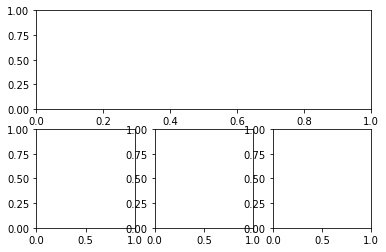

In [19]:
import  matplotlib.pyplot as plt

X = [ (2,1,1), (2,3,4), (2,3,5), (2,3,6) ]
for nrows, ncols, plot_number in X:
    plt.subplot(nrows, ncols, plot_number)

The following example shows nothing special. We will remove the xticks and play around with the size of the figure and the subplots. To do this we introduce the keyword paramter figsize of 'figure' and the function 'subplot_adjust' along with its keyword parameters bottom, left, top, right:

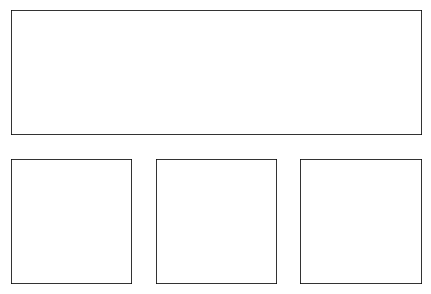

In [20]:
import  matplotlib.pyplot as plt

fig =plt.figure(figsize=(6,4))
fig.subplots_adjust(bottom=0.025, left=0.025, top = 0.975, right=0.975)

X = [ (2,1,1), (2,3,4), (2,3,5), (2,3,6) ]
for nrows, ncols, plot_number in X:
    sub = fig.add_subplot(nrows, ncols, plot_number)
    sub.set_xticks([])
    sub.set_yticks([])



Alternative Solution:

As the first three three elements of 2x3 grid have to be joined, we can choose a tuple notation, inour case (1,3) in (2,3,(1,3)) to define that the first three elements of a notional 2x3 grid are joined:

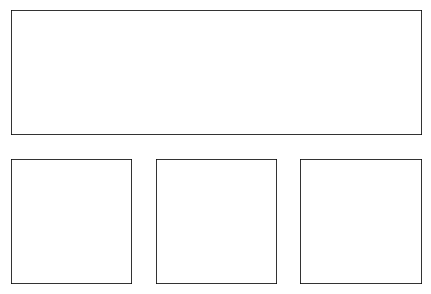

In [21]:
import  matplotlib.pyplot as plt

fig =plt.figure(figsize=(6,4))
fig.subplots_adjust(bottom=0.025, left=0.025, top = 0.975, right=0.975)

X = [ (2,3,(1,3)), (2,3,4), (2,3,5), (2,3,6) ]
for nrows, ncols, plot_number in X:
    sub = fig.add_subplot(nrows, ncols, plot_number)
    sub.set_xticks([])
    sub.set_yticks([])

## Exercise

<br>

How can you create a subplotdesign of a 3x2 design, where the complete first column is spanned?


<br><br>
Solution:

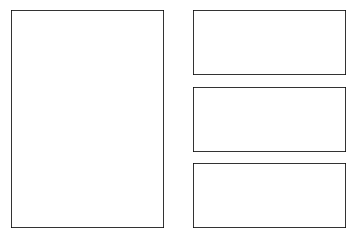

In [22]:
import  matplotlib.pyplot as plt

X = [ (1,2,1), (3,2,2), (3,2,4), (3,2,6) ]
for nrows, ncols, plot_number in X:
    plt.subplot(nrows, ncols, plot_number)
    plt.xticks([])
    plt.yticks([])

<br>

## Exercise

Create a subplot layout for the following design:



<img src="../images/subplot_layout.webp" alt="subplot layout" />

<br><br>
Solution:
<br><br>

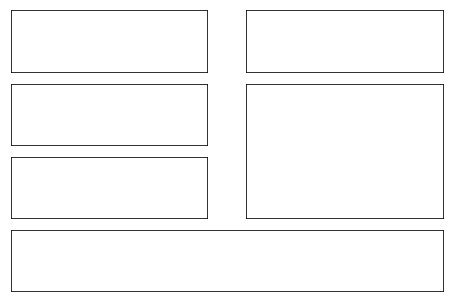

In [23]:
import  matplotlib.pyplot as plt

X = [  (4,2,1),(4,2,2), (4,2,3), (4,2,5), (4,2,(4,6)), (4,1,4)]
plt.subplots_adjust(bottom=0, left=0, top = 0.975, right=1)
for nrows, ncols, plot_number in X:
    plt.subplot(nrows, ncols, plot_number)
    plt.xticks([])
    plt.yticks([])

plt.show()

### Subplots with gridspec

'matplotlib.gridspec' contains a class GridSpec. It can be used as an alternative to subplot to specify the geometry of the subplots to be created. The basic idea behind GridSpec is a 'grid'. A grid is set up with a number of rows and columns. We have to define after this, how much of the grid a subplot should span. 

The following example shows the the trivial or simplest case, i.e. a 1x1 grid

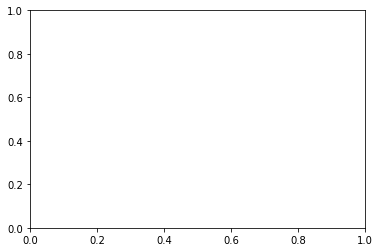

In [24]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure()
gs = GridSpec(1, 1)
ax = fig.add_subplot(gs[0,0])

plt.show()

We could have used some of the parameters of Gridspec, e.g. we can define, that our graph should begin at 20 % from the bottom and 15 % to the left side of the available figure area:

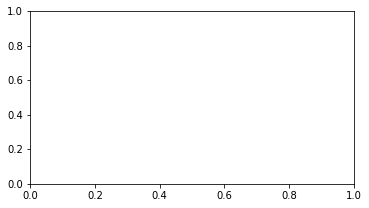

In [25]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure()
gs = GridSpec(1, 1, 
              bottom=0.2,
              left=0.15,
              top=0.8)
ax = fig.add_subplot(gs[0,0])

plt.show()

The next example shows a complexer example with a more elaborate grid design:

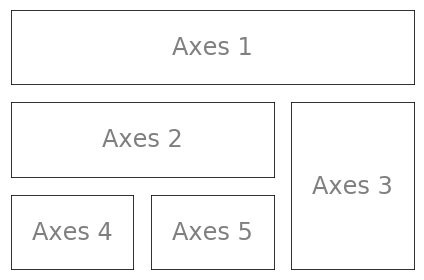

In [26]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
G = gridspec.GridSpec(3, 3)

axes_1 = plt.subplot(G[0, :])
axes_1.set_xticks(())
axes_1.set_yticks(())
axes_1.text(0.5, 0.5, 'Axes 1', 
            ha='center', va='center', 
            size=24, alpha=.5)

axes_2 = plt.subplot(G[1, :-1])
axes_2.set_xticks(())
axes_2.set_yticks(())
axes_2.text(0.5, 0.5, 'Axes 2', 
            ha='center', va='center', 
            size=24, alpha=.5)
axes_3 = plt.subplot(G[1:, -1])
axes_3.set_xticks(())
axes_3.set_yticks(())
axes_3.text(0.5, 0.5, 'Axes 3', 
            ha='center', va='center', 
            size=24, alpha=.5)
axes_4 = plt.subplot(G[-1, 0])
axes_4.set_xticks(())
axes_4.set_yticks(())
axes_4.text(0.5, 0.5, 'Axes 4', 
            ha='center', va='center', 
            size=24, alpha=.5)
axes_5 = plt.subplot(G[-1, -2])
axes_5.set_xticks(())
axes_5.set_yticks(())
axes_5.text(0.5, 0.5, 'Axes 5', 
            ha='center', va='center', 
            size=24, alpha=.5)

plt.tight_layout()
plt.show()



We will use now the grid specification from the previous example to populate it with the graphs of some functions:

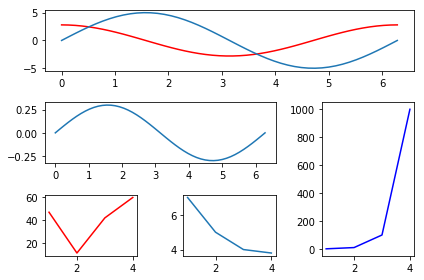

In [27]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6, 4))
G = gridspec.GridSpec(3, 3)

X = np.linspace(0, 2 * np.pi, 50, endpoint=True)
F1 = 2.8 * np.cos(X)
F2 = 5 * np.sin(X)
F3 = 0.3 * np.sin(X)

axes_1 = plt.subplot(G[0, :])
axes_1.plot(X, F1, 'r-', X, F2)

axes_2 = plt.subplot(G[1, :-1])
axes_2.plot(X, F3)

axes_3 = plt.subplot(G[1:, -1])
axes_3.plot([1,2,3,4], [1,10,100,1000], 'b-')

axes_4 = plt.subplot(G[-1, 0])
axes_4.plot([1,2,3,4], [47, 11, 42, 60], 'r-')

axes_5 = plt.subplot(G[-1, -2])
axes_5.plot([1,2,3,4], [7, 5, 4, 3.8])

plt.tight_layout()
plt.show()

### A Plot inside of Another Plot

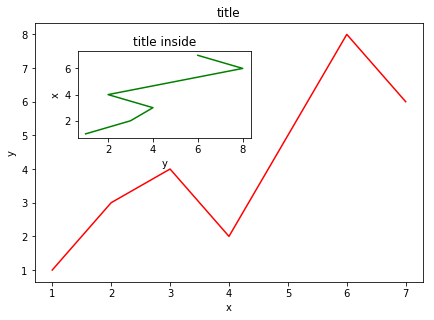

In [28]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

X = [1, 2, 3, 4, 5, 6, 7]
Y = [1, 3, 4, 2, 5, 8, 6]

axes1 = fig.add_axes([0.1, 0.1, 0.9, 0.9]) # main axes
axes2 = fig.add_axes([0.2, 0.6, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(X, Y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(Y, X, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('title inside');

<br><br>

### Setting the Plot Range

It's possible to configure the ranges of the axes. This can be done by using the set_ylim and set_xlim methods in the axis object. With axis('tight') we create automatrically "tightly fitted" axes ranges:

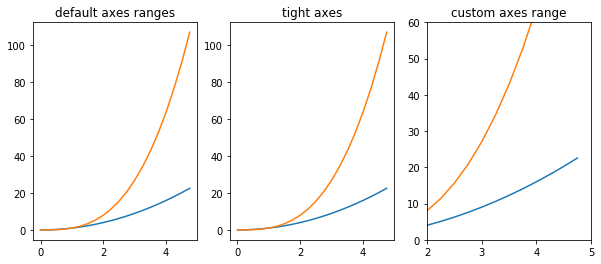

In [29]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(10, 4))

x = np.arange(0, 5, 0.25)

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");


<br><br>

### Logarithmic Scale

It is also possible to set a logarithmic scale for one or both axes. This functionality is in fact only one application of a more general transformation system in Matplotlib. Each of the axes' scales are set seperately using set_xscale and set_yscale methods which accept one parameter (with the value "log" in this case):

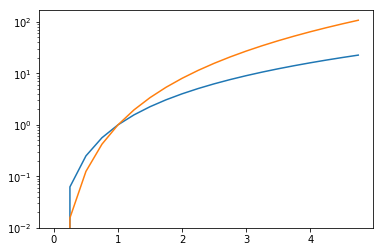

In [30]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = np.arange(0, 5, 0.25)

ax.plot(x, x**2, x, x**3)


ax.set_yscale("log")

plt.show()

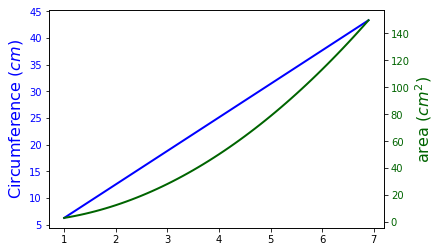

In [31]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

x = np.arange(1,7,0.1)
ax1.plot(x, 2 * np.pi * x, lw=2, color="blue")
ax1.set_ylabel(r"Circumference $(cm)$", fontsize=16, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, np.pi * x ** 2, lw=2, color="darkgreen")
ax2.set_ylabel(r"area $(cm^2)$", fontsize=16, color="darkgreen")
for label in ax2.get_yticklabels():
    label.set_color("darkgreen")



The following topics are not directly related to subplotting, but we want to present them to round up the introduction into the basic possibilities of matplotlib. The first one shows how to define grid lines and the second one is quite important. It is about saving plots in image files.

<br><br>

### Grid Lines

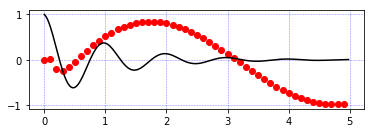

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)
def g(t):
    return np.sin(t) * np.cos(1/(t+0.1))

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
plt.subplot(212)
plt.plot(t1, g(t1), 'ro', t2, f(t2), 'k')
plt.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
plt.show()

<br><br>

### Saving Figures

The savefig method can be used to save figures to a file:
    
fig.savefig("filename.png")

It is possible to optionally specify the DPI and to choose between different output formats:
    
fig.savefig("filename.png", dpi=200)

Output can be generated in the formats PNG, JPG, EPS, SVG, PGF and PDF. 